An Institution wishes to find out their student’s ability in 
mathematics, reading and writing skills. The Institution 
wants to do an exploratory study to check the following 
information.
a. Find out how many males and females participated in 
the test.
b. What do you think about the students' parental level of 
education?
c. Who scores the most on average for math, reading and 
writing based on
i. Gender
ii. Test preparation course
d. What do you think about the scoring variation for 
math, reading and writing based on
i. Gender
ii. Test preparation course
e. The management needs your help to give bonus points 
to the top 25% of students based on their math score, 
so how will you help the management to achieve this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/Students_Performance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
data.shape

(1000, 8)

In [5]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group C            some high school  free/reduced   
1    female        group B                 high school  free/reduced   
2    female        group B            some high school  free/reduced   
3    female        group B                some college      standard   
4    female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
0                      none    

In [6]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.mean()

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [8]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

a. Find out how many males and females participated in the test.

In [9]:
gendercount = data["gender"].value_counts()
print(gendercount)

female    518
male      482
Name: gender, dtype: int64


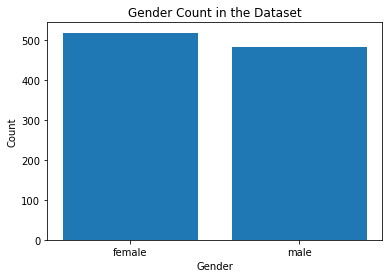

In [10]:
#bar chart
plt.bar(gendercount.index, gendercount.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count in the Dataset")
plt.show()

b. What do you think about the students' parental level of education?

In [11]:
parental_education_count = data["parental level of education"].value_counts()
print(parental_education_count)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


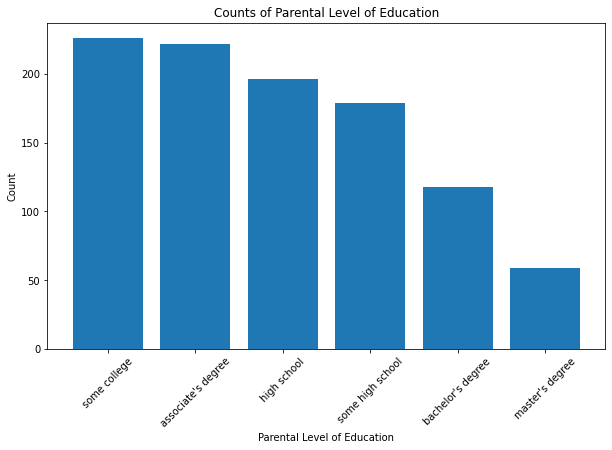

In [12]:
plt.figure(figsize=(10, 6)) 
plt.bar(parental_education_count.index, parental_education_count.values)
plt.xlabel("Parental Level of Education")
plt.ylabel("Count")
plt.title("Counts of Parental Level of Education")
plt.xticks(rotation=45)
plt.show()

c. Who scores the most on average for math, reading and 
writing based on

i. Gender

In [13]:
gender_scores = data.groupby("gender")[["math score", "reading score", "writing score"]].mean()
print(gender_scores)

        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


ii. Test preparation course

In [14]:
course_scores = data.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
print(course_scores)


                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


d. What do you think about the scoring variation for 
math, reading and writing based on

i. Gender

In [15]:
gender_variance = data.groupby("gender")[["math score", "reading score", "writing score"]].var()
print(gender_variance)

        math score  reading score  writing score
gender                                          
female  256.958593     207.677438     220.369327
male    211.889097     200.211010     202.413924


ii. Test preparation course

In [16]:
course_variance = data.groupby("test preparation course")[["math score", "reading score", "writing score"]].var()
print(course_variance)


                         math score  reading score  writing score
test preparation course                                          
completed                210.884027     183.265864     175.202612
none                     246.668662     213.419851     226.251739


e. The management needs your help to give bonus points 
to the top 25% of students based on their math score, 
so how will you help the management to achieve this

In [17]:
top_25_math = data[data["math score"] >= data["math score"].quantile(0.75)]
print(top_25_math)

     gender race/ethnicity parental level of education         lunch  \
414  female        group A                 high school  free/reduced   
415  female        group B             master's degree  free/reduced   
416  female        group B           bachelor's degree  free/reduced   
417  female        group B             master's degree      standard   
418  female        group B                 high school      standard   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
414               completed          77             88         

# Case Study on Testing of Hypothesis 

A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and decided to carry out a study on it. a. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. b. The company needs to check whether there is any dependency between the features “Region” and “Manager”

In [18]:
import statistics as stat

In [19]:
data=pd.read_csv("C:/Users/HP/Downloads/Sales_add.csv")

In [20]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [21]:
data.shape

(22, 5)

In [22]:
data.info

<bound method DataFrame.info of        Month      Region      Manager  Sales_before_digital_add(in $)  \
0    Month-1  Region - A  Manager - A                          132921   
1    Month-2  Region - A  Manager - C                          149559   
2    Month-3  Region - B  Manager - A                          146278   
3    Month-4  Region - B  Manager - B                          152167   
4    Month-5  Region - C  Manager - B                          159525   
5    Month-6  Region - A  Manager - B                          137163   
6    Month-7  Region - C  Manager - C                          130625   
7    Month-8  Region - A  Manager - A                          131140   
8    Month-9  Region - B  Manager - C                          171259   
9   Month-10  Region - C  Manager - B                          141956   
10  Month-11  Region - B  Manager - C                          159339   
11  Month-12  Region - A  Manager - A                          178939   
12  Month-13  Regio

In [23]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [24]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [25]:
data.mean()

Sales_before_digital_add(in $)    149239.954545
Sales_After_digital_add(in $)     231123.727273
dtype: float64

In [26]:
stat.variance(data['Sales_before_digital_add(in $)'])

220345610.23593074

In [27]:
import scipy.stats as stats

In [28]:
from scipy.stats import ttest_ind

In [29]:
sales_before = data['Sales_before_digital_add(in $)']
sales_after = data['Sales_After_digital_add(in $)'] 

In [30]:
#Ttest
t_stat, p_value = stats.ttest_ind(sales_before, sales_after)

In [31]:
p_value

2.614368006904645e-16

In [32]:
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


There is increase in sales after digital marketing

b. The company needs to check whether there is any 
dependency between the features “Region” and 
“Manager”.

In [33]:
#chi square test
from scipy.stats import chi2_contingency

In [34]:
chi_table = pd.crosstab(data['Region'], data['Manager'])

In [35]:
chi_table 

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [36]:
chi2_stat,p_value,Reg,Man = chi2_contingency(chi_table)

In [37]:
p_value

0.5493991051158094

In [38]:
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


There is no dependency between the features Region and Manager statistically